In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winedataset.csv')
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.keys()

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [4]:
data=pd.DataFrame(data=df)
data

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
data.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
diluted wines           178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
data.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

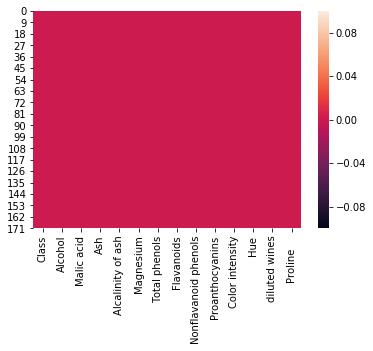

In [9]:
sns.heatmap(data.isnull())

In [10]:
for col in data.columns.values:
    print("Number of unique values of{} :{} ".format(col,data[col].nunique()))

Number of unique values ofClass :3 
Number of unique values ofAlcohol :126 
Number of unique values ofMalic acid :133 
Number of unique values ofAsh :79 
Number of unique values ofAlcalinity of ash :63 
Number of unique values ofMagnesium :53 
Number of unique values ofTotal phenols :97 
Number of unique values ofFlavanoids :132 
Number of unique values ofNonflavanoid phenols :39 
Number of unique values ofProanthocyanins :101 
Number of unique values ofColor intensity :132 
Number of unique values ofHue :78 
Number of unique values ofdiluted wines :122 
Number of unique values ofProline     :121 


In [11]:
data.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [12]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [13]:
data.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              0.529222
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               0.605723
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.097222
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.087930
dtype: float64

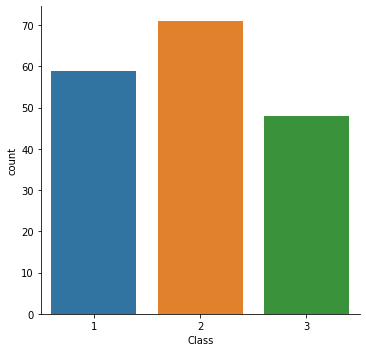

In [14]:
sns.catplot(x='Class',data=data,kind='count')

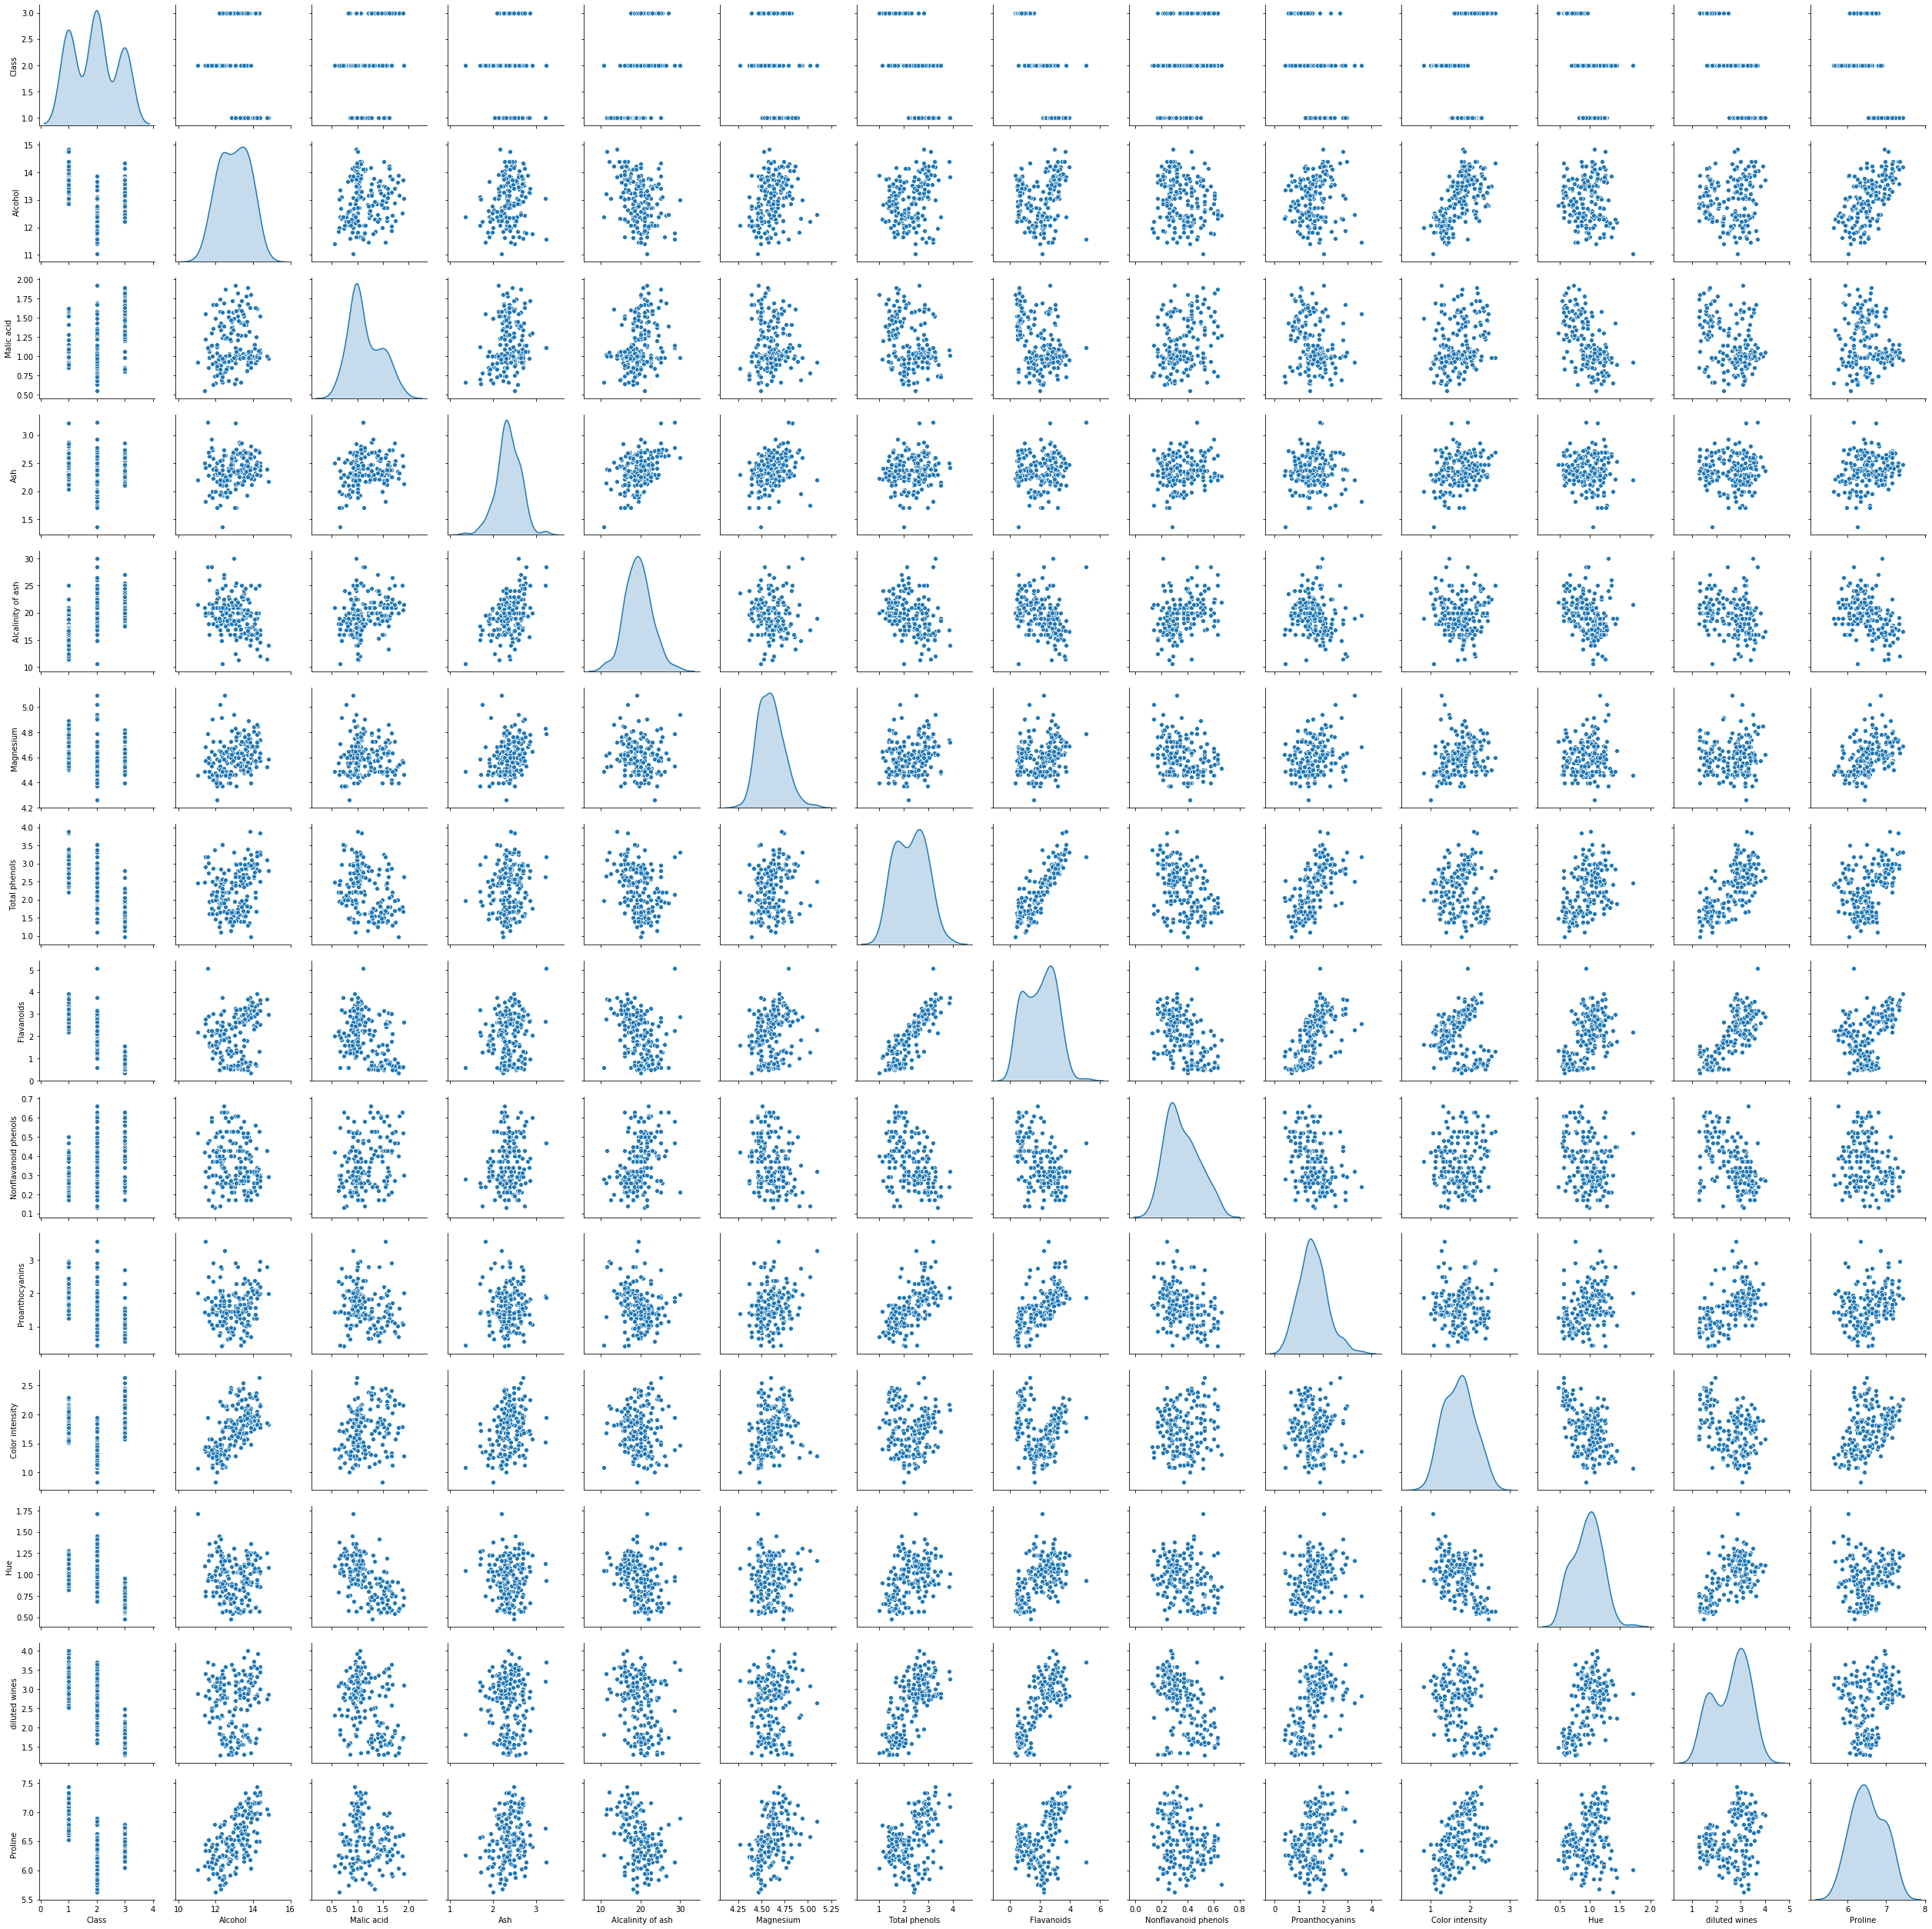

In [15]:
sns.pairplot(data=data,kind='scatter',diag_kind='kde')

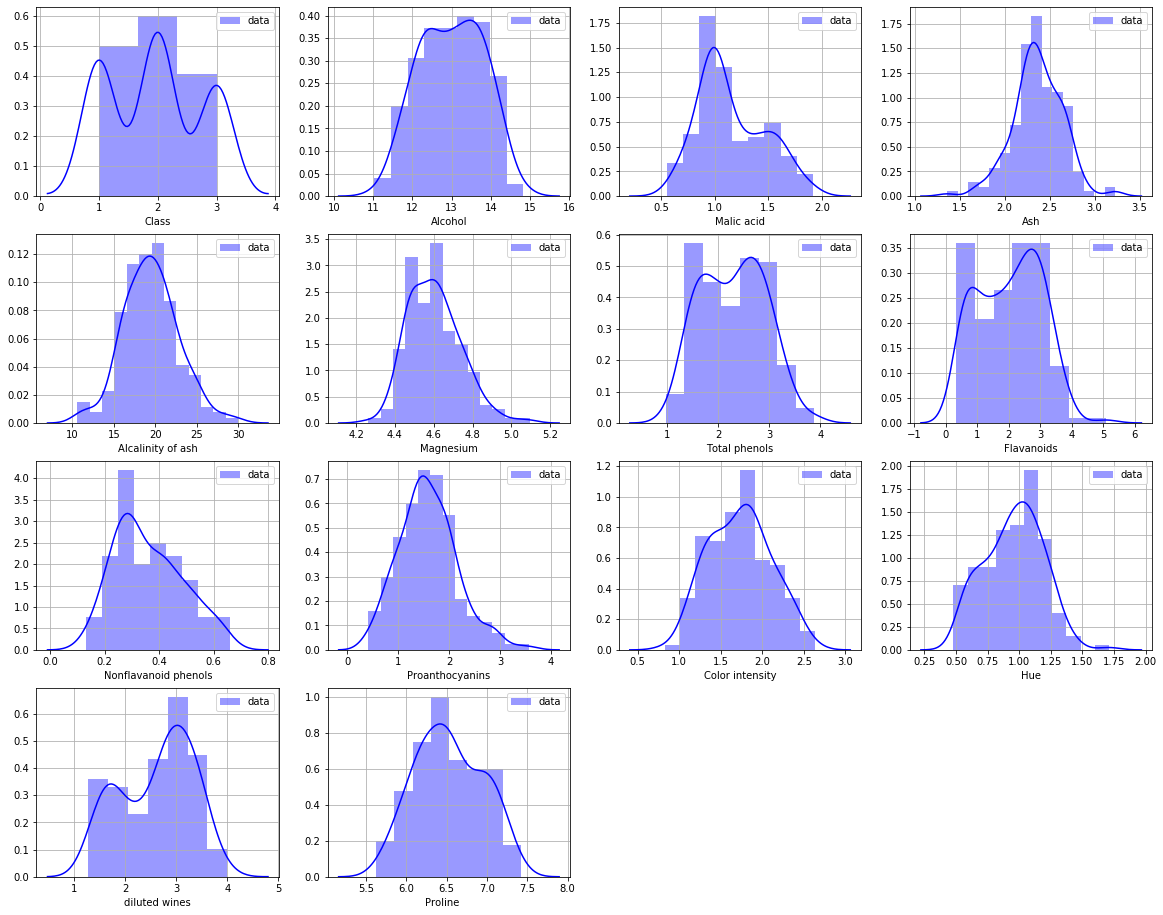

In [16]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(data[col],color='b',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C462FD0B48>,
      dtype=object)

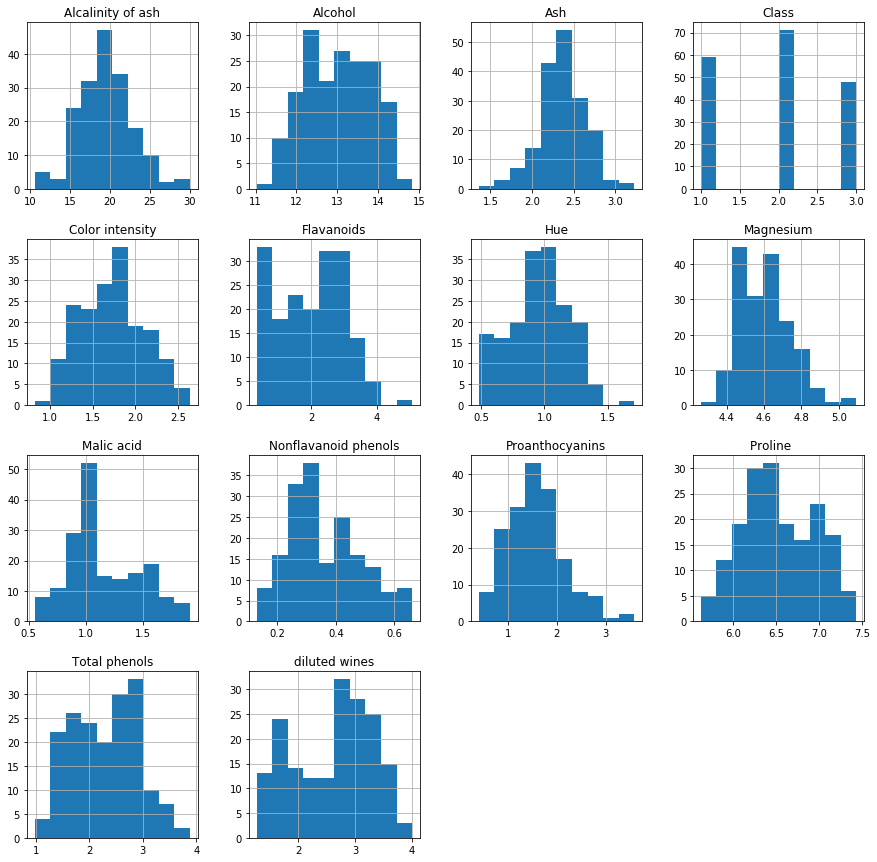

In [17]:
data.hist(figsize=(15,15))

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(data))
print(data.shape)
df_wine=data.loc[(z<3).all(axis=1)]
print(df_wine.shape)

(178, 14)
(170, 14)


In [19]:
df_wine.skew()

Class                   0.104977
Alcohol                -0.030651
Malic acid              0.510074
Ash                    -0.243064
Alcalinity of ash       0.094425
Magnesium               0.271262
Total phenols           0.111388
Flavanoids             -0.076427
Nonflavanoid phenols    0.474603
Proanthocyanins         0.354703
Color intensity         0.063903
Hue                    -0.121305
diluted wines          -0.279718
Proline                 0.081052
dtype: float64

In [20]:
df_wine["Class"].value_counts()

2    64
1    58
3    48
Name: Class, dtype: int64

(14.0, 0.0)

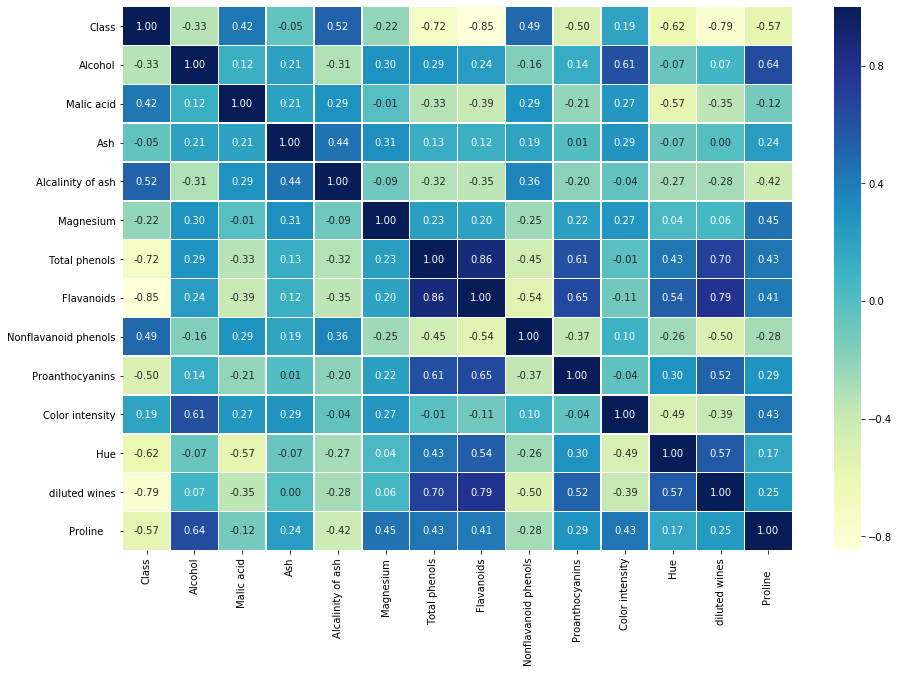

In [21]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [22]:
df_wine.drop(['Flavanoids'],axis=1,inplace=True)

In [23]:
y=df_wine['Class']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 170, dtype: int64

In [24]:
x=df_wine.drop('Class',axis=1)
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,0.996949,2.43,15.6,4.852030,2.80,0.28,2.29,1.893112,1.04,3.92,6.971669
1,13.20,1.022451,2.14,11.2,4.615121,2.65,0.26,1.28,1.682688,1.05,3.40,6.957497
2,13.16,1.211941,2.67,18.6,4.624973,2.80,0.30,2.81,1.899118,1.03,3.17,7.078342
3,14.37,1.081805,2.50,16.8,4.736198,3.85,0.24,2.18,2.174752,0.86,3.45,7.300473
4,13.24,1.278152,2.87,21.0,4.779123,2.80,0.39,1.82,1.671473,1.04,2.93,6.601230
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.894617,2.45,20.5,4.564348,1.68,0.52,1.06,2.163323,0.64,1.74,6.608001
174,13.40,1.591274,2.48,23.0,4.634729,1.80,0.43,1.41,2.116256,0.70,1.56,6.621406
175,13.27,1.663926,2.26,20.0,4.795791,1.59,0.43,1.35,2.415914,0.59,1.56,6.728629
176,13.17,1.278152,2.37,20.0,4.795791,1.65,0.53,1.46,2.332144,0.60,1.62,6.734592


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [27]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.9210526315789473,
 'KNN': 0.9473684210526315,
 'Random Forest': 1.0,
 'GaussianNB': 0.9736842105263158,
 'SVC': 0.9210526315789473,
 'DecisionTreeClassifier': 0.9736842105263158,
 'GradientBoostingClassifier': 0.9473684210526315}

In [28]:
models = {"Random Forest": RandomForestClassifier(n_estimators=100),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "MultinomialNB":MultinomialNB()
         }
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_acc_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(x_train,y_train)
        pre=model.predict(x_test)
        model_acc_scores[name]=accuracy_score(y_test,pre)
    return model_acc_scores

In [29]:
model_acc_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test,
                             )

model_acc_scores

{'Random Forest': 1.0,
 'Logistic Regression': 0.9210526315789473,
 'KNN': 0.9473684210526315,
 'GaussianNB': 0.9736842105263158,
 'SVC': 0.9210526315789473,
 'DecisionTreeClassifier': 0.9473684210526315,
 'GradientBoostingClassifier': 0.9473684210526315,
 'MultinomialNB': 0.8947368421052632}

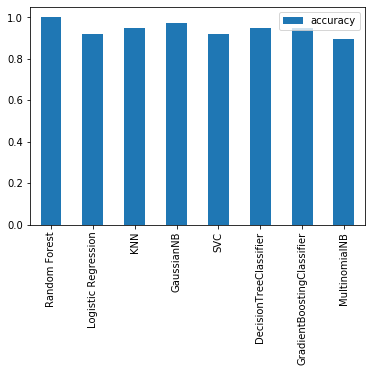

In [30]:
model_compare = pd.DataFrame(model_acc_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [31]:
def maxaccscore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [32]:
rm=RandomForestClassifier(n_estimators=100)
acc_score=maxaccscore(rm,x,y)

max acc score corresponding to 42 is: 1.0


In [33]:
gb=GradientBoostingClassifier()
acc_score=maxaccscore(gb,x,y)

max acc score corresponding to 43 is: 1.0


In [34]:
knn=KNeighborsClassifier(n_neighbors=6)
acc_score=maxaccscore(knn,x,y)

max acc score corresponding to 58 is: 1.0


In [35]:
mnb=MultinomialNB()
acc_score=maxaccscore(mnb,x,y)

max acc score corresponding to 49 is: 0.9473684210526315


In [44]:
model_compare = pd.DataFrame(model_acc_scores, index=["accuracy"])
model_compare

,Random Forest,Logistic Regression,KNN,GaussianNB,SVC,DecisionTreeClassifier,GradientBoostingClassifier,MultinomialNB
accuracy,1.0,0.921053,0.947368,0.973684,0.921053,0.947368,0.947368,0.894737


In [46]:
rf=RandomForestClassifier(n_estimators=2000,random_state=42)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rfpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfpred))
print('Classification Report:',classification_report(y_test,rfpred))

Accuracy Score: 1.0
Confusion Matrix: [[16  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



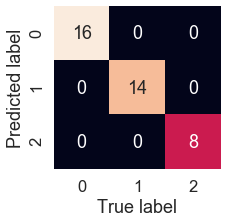

In [47]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, rfpred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, rfpred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, rfpred)

In [48]:
a=pd.DataFrame(data=y_test)
a['ypred']=rfpred
a

,Class,ypred
147,3,3
31,1,1
127,2,2
30,1,1
152,3,3
171,3,3
174,3,3
52,1,1
111,2,2
62,2,2


In [49]:
from sklearn.externals import joblib
joblib.dump(rf,'wine_pred.pkl')

['wine_pred.pkl']

In [50]:
ad_from_joblib=joblib.load('wine_pred.pkl')
ad_from_joblib.predict(x_test)

array([3, 1, 2, 1, 3, 3, 3, 1, 2, 2, 1, 3, 3, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 2, 2, 3, 1, 2], dtype=int64)